# 1. Modelagem do tanque de nível

## Resumo

Nesse exemplo estudaremos como construir um modelo não linear de um tanque de nível.

## Lei de Torricelli

A lei de Torricelli estabelece que a velocidade de um fluido incompressível que sai de um tanque com um líquido no nível $h$ abaixo da superfície é dada por: 

$$v = \sqrt{2gh}$$ 


Aplicado a equação de Bernoulli para uma linha de corrente da superfície do tanque até a saída a uma distânica $h$ da superfície:

$$gh + \frac{P_{atm}}{\rho} = \frac{v^2}{2} + \frac{P_{atm}}{\rho}$$

$$\implies v^2 = 2gh$$
$$\implies v = \sqrt{2gh}$$


## Balanço de massa para um tanque com seção tranversal constante

Para um tanque cilíndrico com seção tranversal constante, a variação do nível de líquido pode ser escrita pela seguinte equação diferecial:

$$A\frac{dh}{dt} = q_{in}(t) - q_{out}(t)$$

onde $q_{out}$ é uma função do nível de líquido. Considerando que a vazão de saída de líquido é proporcional à raiz quadrada do nível, podemos escrever: 

$$ q_{out}(h) = C_v\sqrt{h} $$

Dividindo pela área temos a seguinte equação diferencial: 

$$ \frac{dh}{dt} = - \frac{C_V}{A}\sqrt{h} + \frac{1}{A}q_{in}(t) $$


## Passo-a-passo da simulação

### Passo 1. Inicializar o Jupyter e o Python

O primeiro passo em uma aplicação python é inicializar a visualização gráfica do Jupyter e importar as bibliotecas necessárias.  

O comando `%matplotlib inline` é um comando que informa ao Jupyter notebook que os gráficos gerados serão mostrados no notebook..

Nós importamos então a biblioteca (`matplotlib.pyplot`) que será usada com o prefixo `plt`, a biblioteca numérica `numpy` que será usada com o prefixo `np`, e a função `odeint` importada da bilioteca `scipy.integrate`.  

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### Passo 2. Definindo os parâmetros

Especificar os valores de todos os parâmetros do modelo.  Usar comentários para descrever os parâmetros.

In [159]:
Cv  = 0.1     # Constante da válvula [cubic meters/min/meter^1/2]
A   = 1.0     # Área do tanque [meter^2]
q_s = 0.15    # Valor da vazão de entrada no instante inicial
h_s = (q_s/Cv)**2  # Valor do nível no estado estacionário

### Passo 3. Escrever as funções 

In [163]:
# Vazão de entrada [cubic meters/mi]n
def qin(t):
    return 0.2 # valor da vazão a partir do instante t=0

# Equação diferencial não linear (original)
def deriv(h,t):
    return qin(t)/A - Cv*np.sqrt(h)/A

# Equação diferencial linearizada
def deriv_linear(h1,t):
    return (qin(t)-q_s)/A - Cv*(h1-h_s)/(2*A*np.sqrt(h_s))

### Passo 4. Escolher a condição inicial, intervalo de amostragem e integrar a equação diferencial

In [164]:
IC = [h_s]
t = np.linspace(0,400,101) # 0 até 200 minutos (usando 101 pontos)
h = odeint(deriv,IC,t) # integrando a EDO (valor inicial)
h1 = odeint(deriv_linear,IC,t) # integrando a EDO (valor inicial)

### Passo 5. Visualizar e analisar os resultados

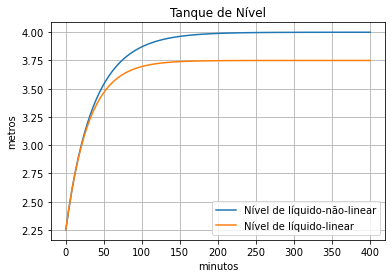

In [169]:
plt.plot(t,h,t,h1)

plt.xlabel('minutos')
plt.ylabel('metros')
plt.title('Tanque de Nível')
plt.legend(['Nível de líquido-não-linear','Nível de líquido-linear']);
plt.grid()

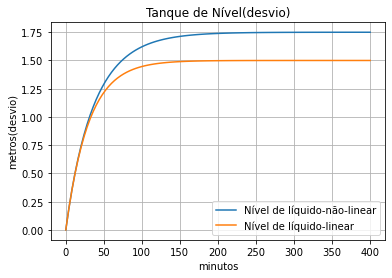

In [170]:
plt.plot(t,h-h_s,t,h1-h_s)

plt.xlabel('minutos')
plt.ylabel('metros(desvio)')
plt.title('Tanque de Nível(desvio)')
plt.legend(['Nível de líquido-não-linear','Nível de líquido-linear']);
plt.grid()